In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_CW.csv')

In [3]:
data

,label,X_min,X_max,X_range,X_mean,X_rms,X_std,Y_min,Y_max,Y_range,...,Z_jerk_mean,Z_jerk_rms,Z_jerk_std,total_jerk_min,total_jerk_max,total_jerk_range,total_jerk_mean,total_jerk_rms,total_jerk_std,timestamp_range
0,1,-0.589872,0.347272,0.937143,-0.194542,0.268091,0.185794,-1.267788,0.004404,1.272193,...,-0.275866,16.042870,16.156316,-24.266511,29.783611,54.050122,-0.272102,11.621308,11.702008,0.759
1,1,-0.678279,0.259369,0.937648,-0.200295,0.283716,0.202370,-2.018337,0.155951,2.174288,...,-0.017593,19.087411,19.223258,-47.033978,40.079267,87.113246,0.439634,14.617773,14.715156,0.770
2,1,-0.703621,0.355244,1.058865,-0.209411,0.300929,0.217460,-1.167808,-0.012946,1.154862,...,1.017398,12.942794,12.983137,-23.432654,30.300758,53.733412,0.677985,10.235956,10.277114,0.880
3,1,-0.711522,0.555218,1.266740,-0.207122,0.319552,0.244856,-1.471754,-0.024032,1.447722,...,-1.453922,12.462453,12.454471,-29.483934,22.118163,51.602097,-1.472199,10.735650,10.700486,0.880
4,1,-0.676285,0.676534,1.352819,-0.070346,0.298983,0.292520,-1.130257,0.102537,1.232795,...,3.066248,16.538112,16.359362,-28.066213,35.876247,63.942460,2.549368,12.604363,12.425872,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4,-0.953433,0.250183,1.203616,-0.267446,0.335269,0.203024,-0.800211,0.143310,0.943521,...,0.247229,9.659509,9.696496,-22.074841,23.390863,45.465704,0.201233,6.968500,6.994557,1.320
2549,4,-0.633834,1.097093,1.730927,-0.075134,0.373065,0.367049,-1.246303,0.299869,1.546173,...,-0.056797,14.140192,14.203063,-52.673864,46.050547,98.724410,0.001120,14.968089,15.034762,1.232
2550,4,-1.385272,0.583667,1.968939,-0.247752,0.407022,0.324163,-1.960975,0.035151,1.996125,...,0.071263,15.528399,15.587391,-45.077351,54.306146,99.383498,0.082529,12.754323,12.802643,1.441
2551,4,-0.676367,0.664444,1.340811,-0.164913,0.298208,0.249576,-0.899431,0.297562,1.196992,...,-0.096257,9.774722,9.818178,-32.409254,25.582425,57.991680,-0.220048,8.565381,8.601038,1.221


In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [7]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((1787, 43), (766, 43))

In [8]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((651, 43), (115, 43))

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

2024-11-02 16:35:50.838649: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 16:35:50.839990: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 16:35:50.863654: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 16:35:50.863678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 16:35:50.863695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

In [11]:
model.compile(optimizer='Adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                                epochs=400,
                                batch_size=32,
                                validation_data= (x_val, y_val),  # 20% of training data for validation
                                verbose=2)

Epoch 1/400
56/56 - 1s - loss: 1.4270 - accuracy: 0.3397 - val_loss: 1.2391 - val_accuracy: 0.4547 - 678ms/epoch - 12ms/step
Epoch 2/400
56/56 - 0s - loss: 1.2614 - accuracy: 0.4387 - val_loss: 1.0639 - val_accuracy: 0.5054 - 72ms/epoch - 1ms/step
Epoch 3/400
56/56 - 0s - loss: 1.1763 - accuracy: 0.4734 - val_loss: 0.9740 - val_accuracy: 0.6590 - 71ms/epoch - 1ms/step
Epoch 4/400
56/56 - 0s - loss: 1.1195 - accuracy: 0.5316 - val_loss: 0.9216 - val_accuracy: 0.6575 - 71ms/epoch - 1ms/step
Epoch 5/400
56/56 - 0s - loss: 1.0630 - accuracy: 0.5529 - val_loss: 0.8688 - val_accuracy: 0.6743 - 73ms/epoch - 1ms/step
Epoch 6/400
56/56 - 0s - loss: 0.9980 - accuracy: 0.5764 - val_loss: 0.8168 - val_accuracy: 0.6774 - 71ms/epoch - 1ms/step
Epoch 7/400
56/56 - 0s - loss: 0.9465 - accuracy: 0.6195 - val_loss: 0.7795 - val_accuracy: 0.6912 - 71ms/epoch - 1ms/step
Epoch 8/400
56/56 - 0s - loss: 0.9110 - accuracy: 0.6228 - val_loss: 0.7573 - val_accuracy: 0.6836 - 71ms/epoch - 1ms/step
Epoch 9/400
56

Epoch 68/400
56/56 - 0s - loss: 0.3866 - accuracy: 0.8629 - val_loss: 0.4104 - val_accuracy: 0.8633 - 70ms/epoch - 1ms/step
Epoch 69/400
56/56 - 0s - loss: 0.4154 - accuracy: 0.8495 - val_loss: 0.4297 - val_accuracy: 0.8387 - 70ms/epoch - 1ms/step
Epoch 70/400
56/56 - 0s - loss: 0.4096 - accuracy: 0.8456 - val_loss: 0.4242 - val_accuracy: 0.8402 - 70ms/epoch - 1ms/step
Epoch 71/400
56/56 - 0s - loss: 0.4282 - accuracy: 0.8388 - val_loss: 0.4275 - val_accuracy: 0.8479 - 69ms/epoch - 1ms/step
Epoch 72/400
56/56 - 0s - loss: 0.4188 - accuracy: 0.8461 - val_loss: 0.4172 - val_accuracy: 0.8602 - 70ms/epoch - 1ms/step
Epoch 73/400
56/56 - 0s - loss: 0.3987 - accuracy: 0.8545 - val_loss: 0.4320 - val_accuracy: 0.8449 - 69ms/epoch - 1ms/step
Epoch 74/400
56/56 - 0s - loss: 0.3791 - accuracy: 0.8551 - val_loss: 0.4341 - val_accuracy: 0.8602 - 70ms/epoch - 1ms/step
Epoch 75/400
56/56 - 0s - loss: 0.3608 - accuracy: 0.8791 - val_loss: 0.4153 - val_accuracy: 0.8556 - 70ms/epoch - 1ms/step
Epoch 76

Epoch 134/400
56/56 - 0s - loss: 0.3060 - accuracy: 0.8847 - val_loss: 0.4026 - val_accuracy: 0.8556 - 69ms/epoch - 1ms/step
Epoch 135/400
56/56 - 0s - loss: 0.2908 - accuracy: 0.8948 - val_loss: 0.4025 - val_accuracy: 0.8740 - 69ms/epoch - 1ms/step
Epoch 136/400
56/56 - 0s - loss: 0.2849 - accuracy: 0.9021 - val_loss: 0.3919 - val_accuracy: 0.8802 - 70ms/epoch - 1ms/step
Epoch 137/400
56/56 - 0s - loss: 0.2812 - accuracy: 0.8987 - val_loss: 0.3849 - val_accuracy: 0.8740 - 69ms/epoch - 1ms/step
Epoch 138/400
56/56 - 0s - loss: 0.2910 - accuracy: 0.9021 - val_loss: 0.4110 - val_accuracy: 0.8740 - 69ms/epoch - 1ms/step
Epoch 139/400
56/56 - 0s - loss: 0.3040 - accuracy: 0.8881 - val_loss: 0.3713 - val_accuracy: 0.8694 - 69ms/epoch - 1ms/step
Epoch 140/400
56/56 - 0s - loss: 0.2938 - accuracy: 0.8920 - val_loss: 0.3776 - val_accuracy: 0.8771 - 68ms/epoch - 1ms/step
Epoch 141/400
56/56 - 0s - loss: 0.2691 - accuracy: 0.8998 - val_loss: 0.3816 - val_accuracy: 0.8802 - 69ms/epoch - 1ms/step


Epoch 200/400
56/56 - 0s - loss: 0.2832 - accuracy: 0.9010 - val_loss: 0.3585 - val_accuracy: 0.8971 - 70ms/epoch - 1ms/step
Epoch 201/400
56/56 - 0s - loss: 0.2370 - accuracy: 0.9133 - val_loss: 0.3590 - val_accuracy: 0.9017 - 70ms/epoch - 1ms/step
Epoch 202/400
56/56 - 0s - loss: 0.1989 - accuracy: 0.9328 - val_loss: 0.3922 - val_accuracy: 0.8786 - 70ms/epoch - 1ms/step
Epoch 203/400
56/56 - 0s - loss: 0.2534 - accuracy: 0.9065 - val_loss: 0.3969 - val_accuracy: 0.8648 - 71ms/epoch - 1ms/step
Epoch 204/400
56/56 - 0s - loss: 0.2601 - accuracy: 0.9037 - val_loss: 0.3911 - val_accuracy: 0.8786 - 71ms/epoch - 1ms/step
Epoch 205/400
56/56 - 0s - loss: 0.2160 - accuracy: 0.9155 - val_loss: 0.3737 - val_accuracy: 0.8802 - 70ms/epoch - 1ms/step
Epoch 206/400
56/56 - 0s - loss: 0.2422 - accuracy: 0.9155 - val_loss: 0.3983 - val_accuracy: 0.8863 - 70ms/epoch - 1ms/step
Epoch 207/400
56/56 - 0s - loss: 0.2250 - accuracy: 0.9161 - val_loss: 0.3867 - val_accuracy: 0.8833 - 70ms/epoch - 1ms/step


Epoch 266/400
56/56 - 0s - loss: 0.2073 - accuracy: 0.9222 - val_loss: 0.3869 - val_accuracy: 0.8817 - 71ms/epoch - 1ms/step
Epoch 267/400
56/56 - 0s - loss: 0.2118 - accuracy: 0.9245 - val_loss: 0.3813 - val_accuracy: 0.8909 - 70ms/epoch - 1ms/step
Epoch 268/400
56/56 - 0s - loss: 0.1842 - accuracy: 0.9334 - val_loss: 0.3695 - val_accuracy: 0.8909 - 70ms/epoch - 1ms/step
Epoch 269/400
56/56 - 0s - loss: 0.1851 - accuracy: 0.9312 - val_loss: 0.3825 - val_accuracy: 0.8894 - 70ms/epoch - 1ms/step
Epoch 270/400
56/56 - 0s - loss: 0.1970 - accuracy: 0.9273 - val_loss: 0.3981 - val_accuracy: 0.8909 - 70ms/epoch - 1ms/step
Epoch 271/400
56/56 - 0s - loss: 0.2151 - accuracy: 0.9205 - val_loss: 0.4162 - val_accuracy: 0.8833 - 70ms/epoch - 1ms/step
Epoch 272/400
56/56 - 0s - loss: 0.2015 - accuracy: 0.9334 - val_loss: 0.4253 - val_accuracy: 0.8879 - 71ms/epoch - 1ms/step
Epoch 273/400
56/56 - 0s - loss: 0.2114 - accuracy: 0.9211 - val_loss: 0.3875 - val_accuracy: 0.8848 - 70ms/epoch - 1ms/step


Epoch 332/400
56/56 - 0s - loss: 0.1815 - accuracy: 0.9317 - val_loss: 0.4181 - val_accuracy: 0.8848 - 70ms/epoch - 1ms/step
Epoch 333/400
56/56 - 0s - loss: 0.1683 - accuracy: 0.9418 - val_loss: 0.4297 - val_accuracy: 0.8848 - 71ms/epoch - 1ms/step
Epoch 334/400
56/56 - 0s - loss: 0.1975 - accuracy: 0.9301 - val_loss: 0.4270 - val_accuracy: 0.8817 - 70ms/epoch - 1ms/step
Epoch 335/400
56/56 - 0s - loss: 0.1871 - accuracy: 0.9323 - val_loss: 0.4106 - val_accuracy: 0.9017 - 77ms/epoch - 1ms/step
Epoch 336/400
56/56 - 0s - loss: 0.2084 - accuracy: 0.9233 - val_loss: 0.4122 - val_accuracy: 0.8879 - 70ms/epoch - 1ms/step
Epoch 337/400
56/56 - 0s - loss: 0.1730 - accuracy: 0.9373 - val_loss: 0.4124 - val_accuracy: 0.9063 - 70ms/epoch - 1ms/step
Epoch 338/400
56/56 - 0s - loss: 0.1838 - accuracy: 0.9328 - val_loss: 0.4205 - val_accuracy: 0.8894 - 70ms/epoch - 1ms/step
Epoch 339/400
56/56 - 0s - loss: 0.1900 - accuracy: 0.9356 - val_loss: 0.4043 - val_accuracy: 0.8925 - 70ms/epoch - 1ms/step


Epoch 398/400
56/56 - 0s - loss: 0.1773 - accuracy: 0.9379 - val_loss: 0.4044 - val_accuracy: 0.8940 - 70ms/epoch - 1ms/step
Epoch 399/400
56/56 - 0s - loss: 0.1670 - accuracy: 0.9424 - val_loss: 0.4363 - val_accuracy: 0.8848 - 70ms/epoch - 1ms/step
Epoch 400/400
56/56 - 0s - loss: 0.1802 - accuracy: 0.9362 - val_loss: 0.4153 - val_accuracy: 0.8863 - 69ms/epoch - 1ms/step


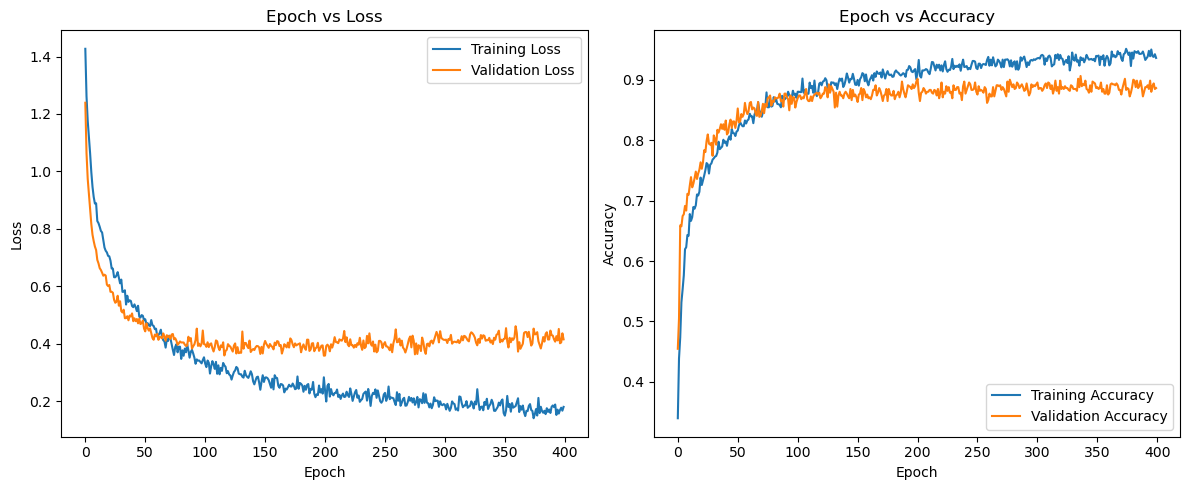

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.49%
Test Accuracy: 86.09%


4/4 [==============================] - 0s 949us/step


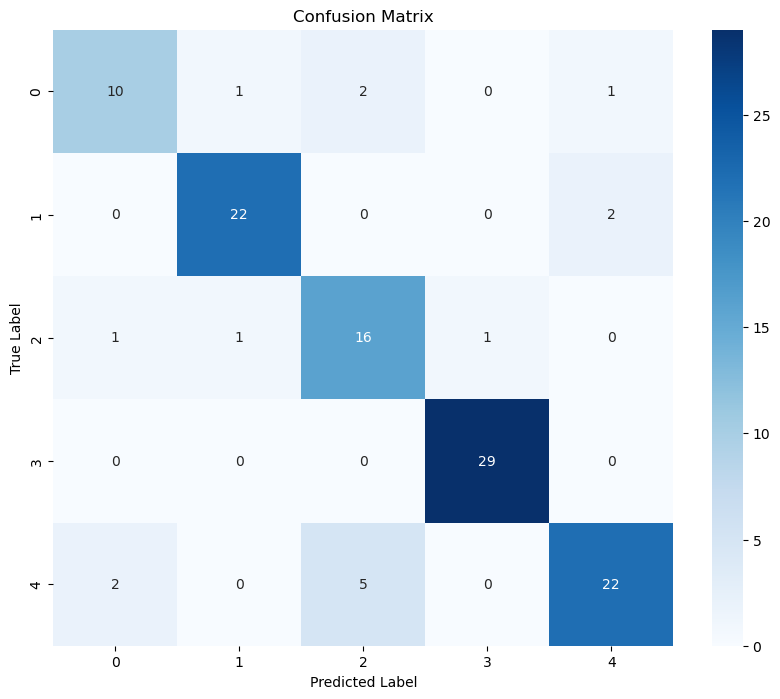

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.92      0.92      0.92        24
           2       0.70      0.84      0.76        19
           3       0.97      1.00      0.98        29
           4       0.88      0.76      0.81        29

    accuracy                           0.86       115
   macro avg       0.85      0.85      0.84       115
weighted avg       0.87      0.86      0.86       115



In [15]:
# Predict the values from the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Check if y_test is already in label format (i.e., not one-hot encoded)
if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  # If y_test is already in label format
else:
    y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11264     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5